In [41]:
%matplotlib inline

Error with default parameters: 4.726936730826608
Error for 1 components: 5.026627358518521
Error for 2 components: 4.726936730826608
Error for 3 components: 4.373524997116778
Error for 4 components: 4.199407222136771
Error for 5 components: 3.876624923901318
Error for 6 components: 3.725906559731829
Error for 7 components: 3.873745373350095
Error for 8 components: 3.779372466775094
Error for 9 components: 3.820684873991759
Error for 10 components: 3.819503609715395
Error for 11 components: 3.891330491907453
Error for 12 components: 3.8583143074876878
Error for 13 components: 3.8381097246746037


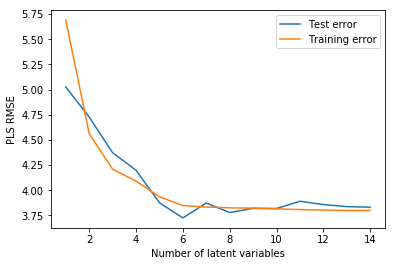

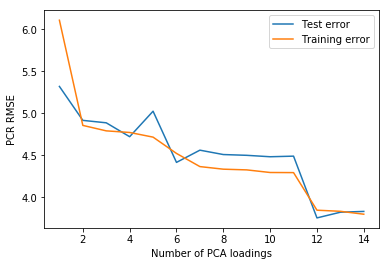

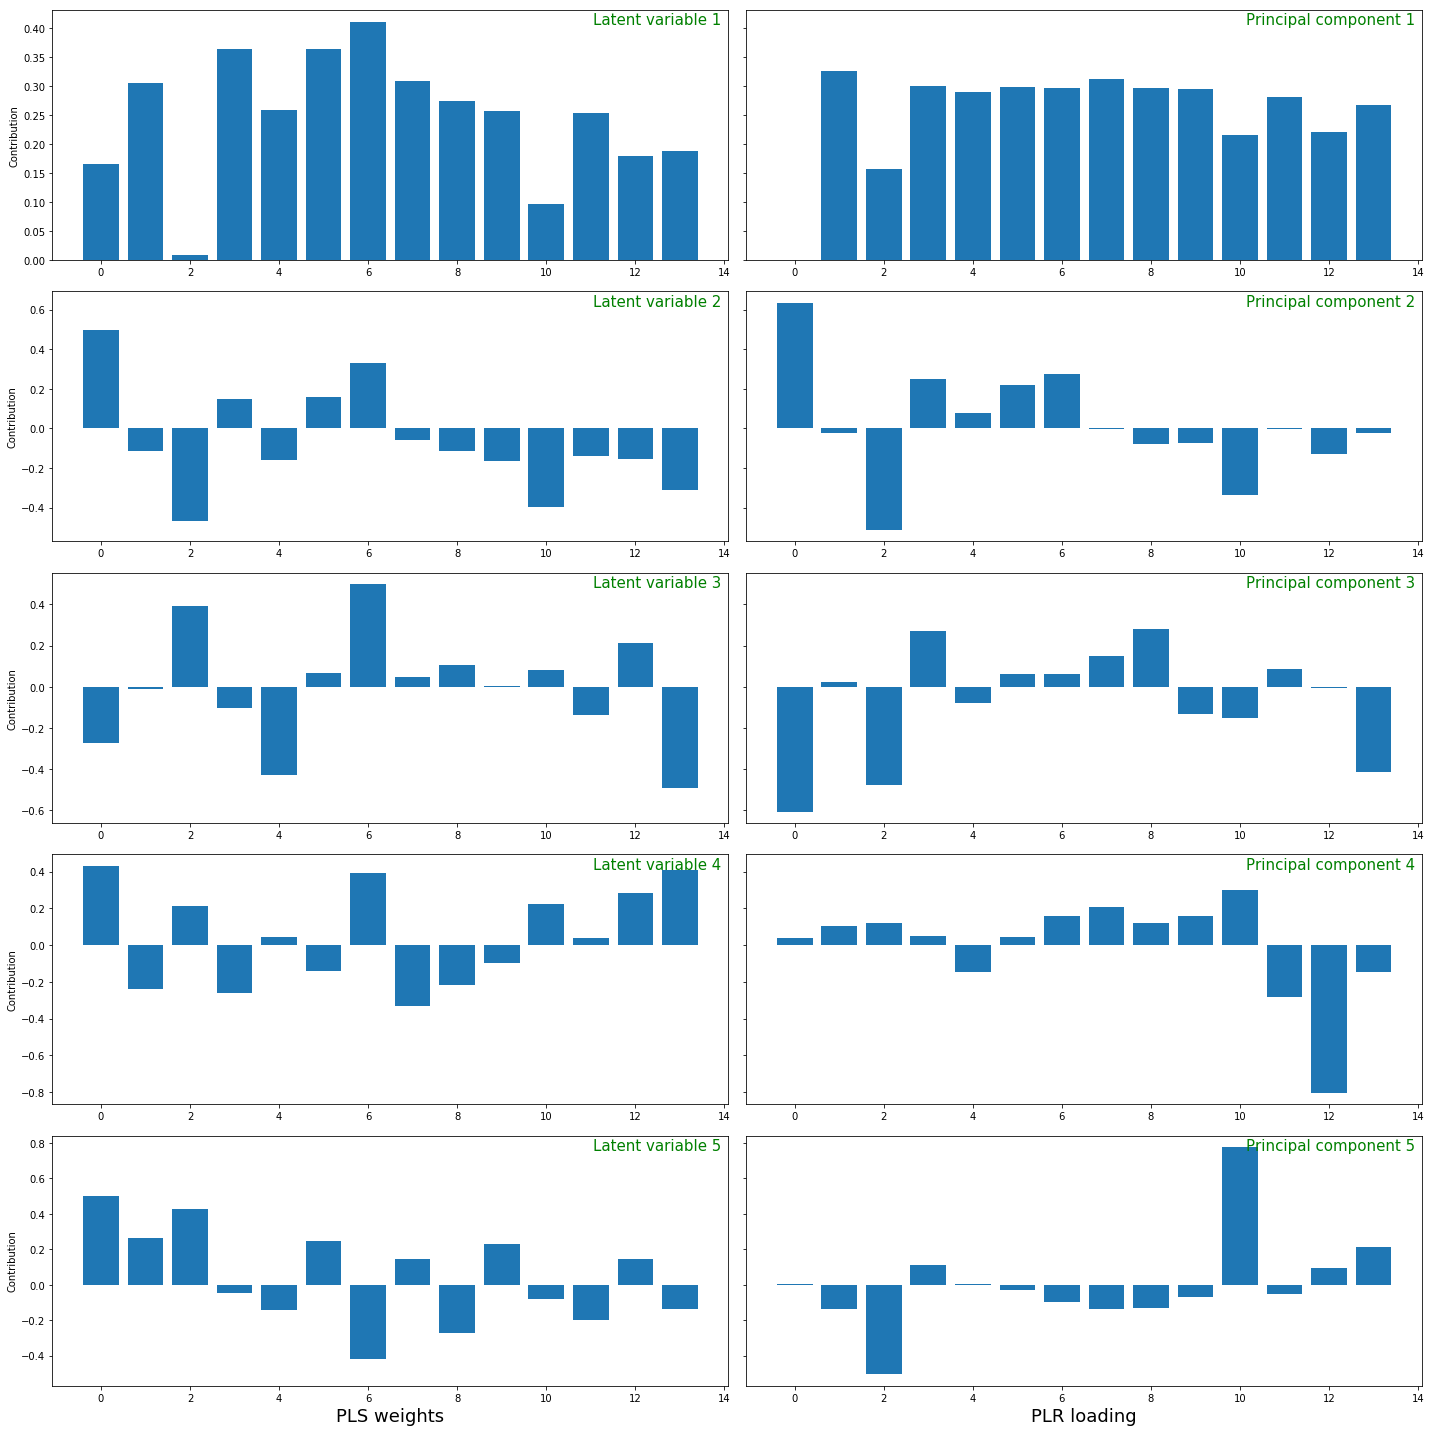

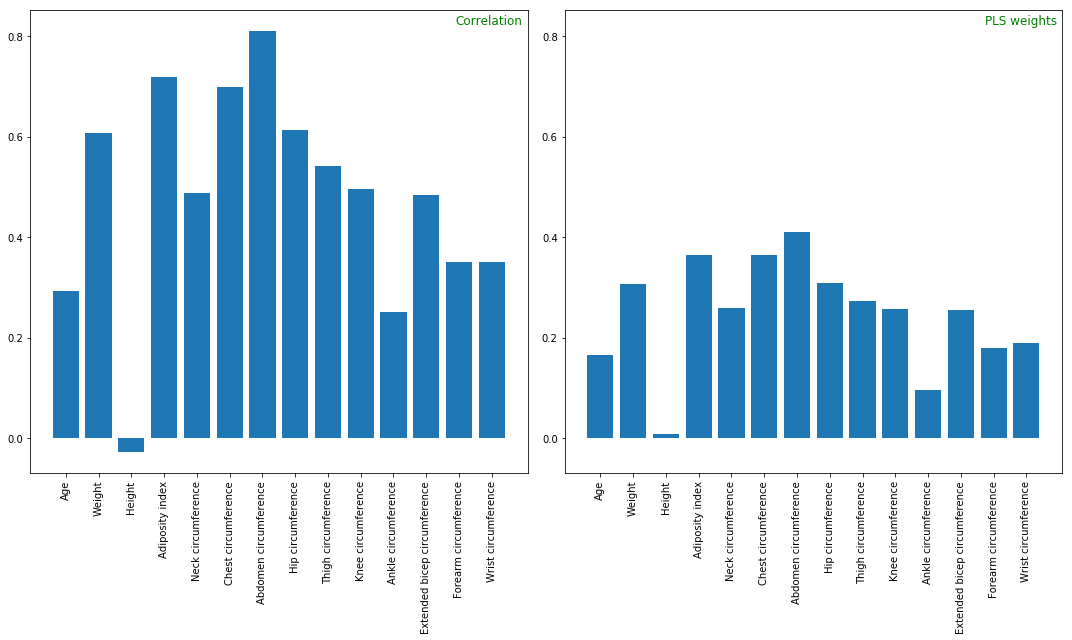

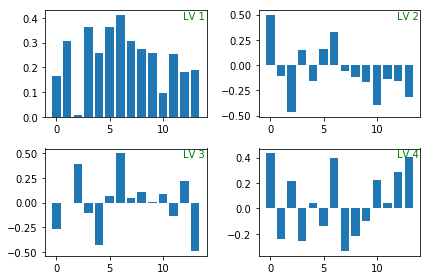

Final validation performance: 4.350209199901712


<Figure size 432x288 with 0 Axes>

In [101]:
%run hw05.py

In [43]:
def plot_residuals(n_components, xtr, ytr, xts, yts):
    model = PLSRegression(n_components=n_components)
    model.fit(xtr, ytr)
    residuals = yts - model.predict(xts)
    plt.plot(yts, model.predict(xts), '.')
    plt.plot([0, 50], [0, 50])
    plt.show()

In [44]:
tmp3 = pcr_models[4]

In [45]:
def simpls(niter, x, y):
    s = x.T @ y
    if niter == 1:
        u, s, v = np.linalg.svd(s)
        r = u[:, 1].reshape((-1, 1))
        t = (x @ r).reshape((-1, 1))
        p = (x.T @ t / (t.T @ t)).reshape((-1, 1))
    else:
        r_l, t_l, p_l = simpls(niter-1, x, y)
        _ = s - p_l @ np.linalg.inv(p_l.T @ p_l) @ p_l.T @ s
        u, s, v = np.linalg.svd(_)
        r_n = u[:,1].reshape((-1, 1))
        t_n = (x @ r_n).reshape((-1, 1))
        p_n = (x.T @ t_n / (t_n.T @ t_n)).reshape((-1, 1))
        r = np.hstack([r_l, r_n])
        t = np.hstack([t_l, t_n])
        p = np.hstack([p_l, p_n])
    return r, t, p

In [47]:
def plsr(niter, x, y):
    r, t, p = simpls(niter, x, y)
    b = r @ np.linalg.inv(t.T @ t) @ t.T @ y
    return b

In [48]:
plsr(2, xtr, ytr)

array([[ 0.45369189],
       [ 0.36562752],
       [-0.07932255],
       [-0.0541537 ],
       [-0.05338271],
       [-0.15429302],
       [-0.16350272],
       [-0.16075779],
       [-0.10729835],
       [-0.0555344 ],
       [-0.03411966],
       [-0.05535947],
       [-0.0393238 ],
       [-0.02201366]])

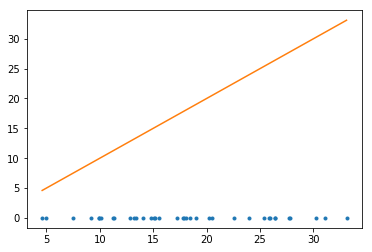

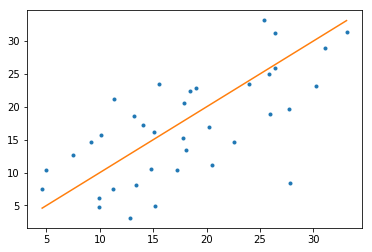

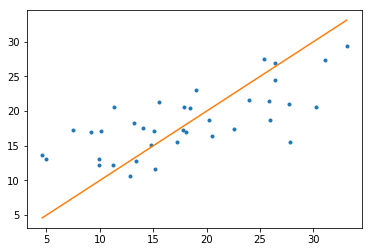

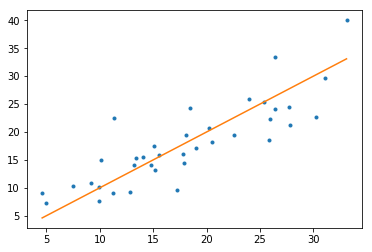

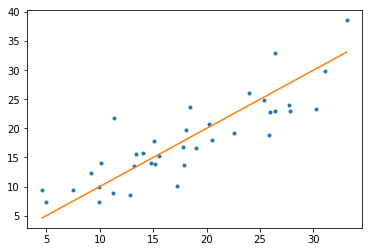

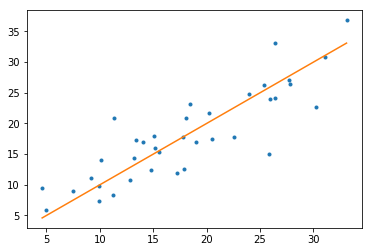

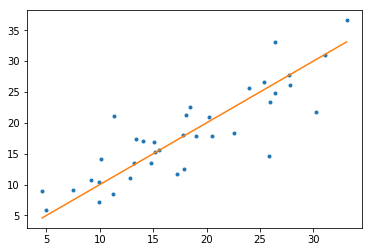

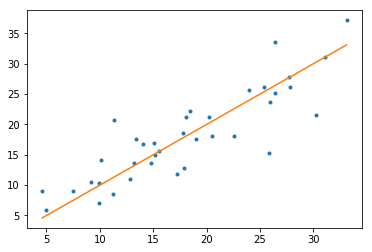

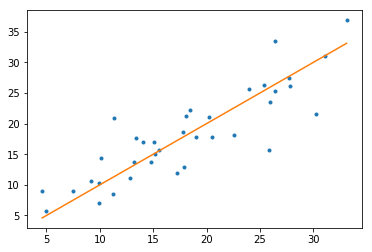

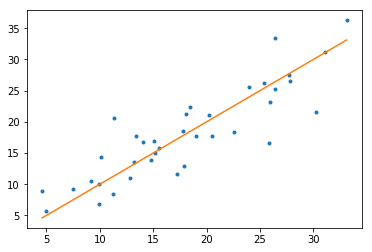

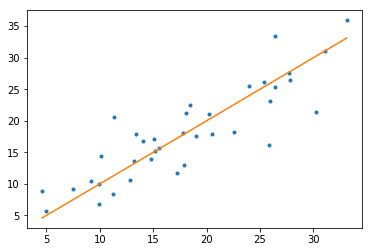

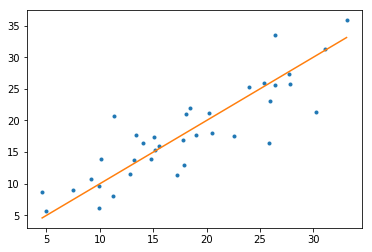

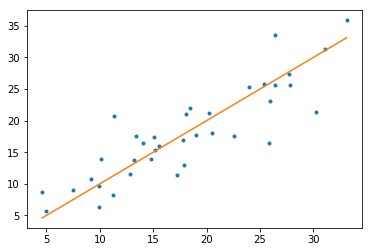

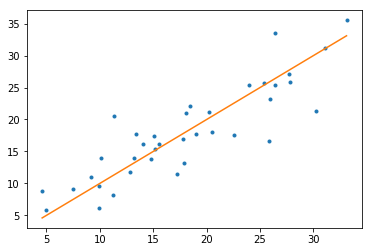

In [49]:
e = []
for i in range(1, 15):
    b = plsr(i, xtr, ytr)
    e.append(rmse(yts, xts @ b))
    plt.plot(yts, xts @ b, '.')
    plt.plot([min(yts), max(yts)], [min(yts), max(yts)])
    plt.show()

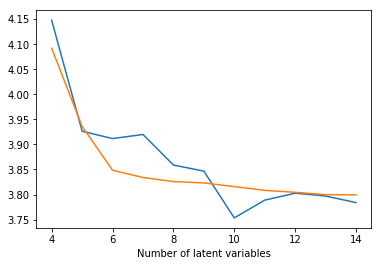

In [50]:
etr = [rmse(ytr, m.predict(xtr)) for m in pls_models]
plt.plot(range(4, len(e)+1), e[3:])
plt.plot(range(4, len(e)+1), etr[3:])
plt.xlabel("Number of latent variables")
plt.show()

In [51]:
tmp = pls_models[0]

In [52]:
tmp.algorithm

'nipals'

In [53]:
from sklearn.cross_decomposition import PLSCanonical

In [54]:
tmppls = PLSCanonical(algorithm="svd")
tmppls.fit(xtr, ytr)

/Users/jrpowers-luhn/miniconda3/envs/579/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:287: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)


PLSCanonical(algorithm='svd', copy=True, max_iter=500, n_components=2,
       scale=True, tol=1e-06)

In [55]:
t1, t2 = tmppls.transform(xtr, ytr)

In [56]:
lr = LinearRegression()

In [57]:
lr.fit(t1, t2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [59]:
p = Pipeline([
    ('pls', PLSRegression())
])
grid = {
    'pls__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
}
reg = GridSearchCV(p, grid, scoring=make_scorer(rmse))

In [60]:
reg.fit(xtr, ytr)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pls', PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'pls__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(rmse), verbose=0)

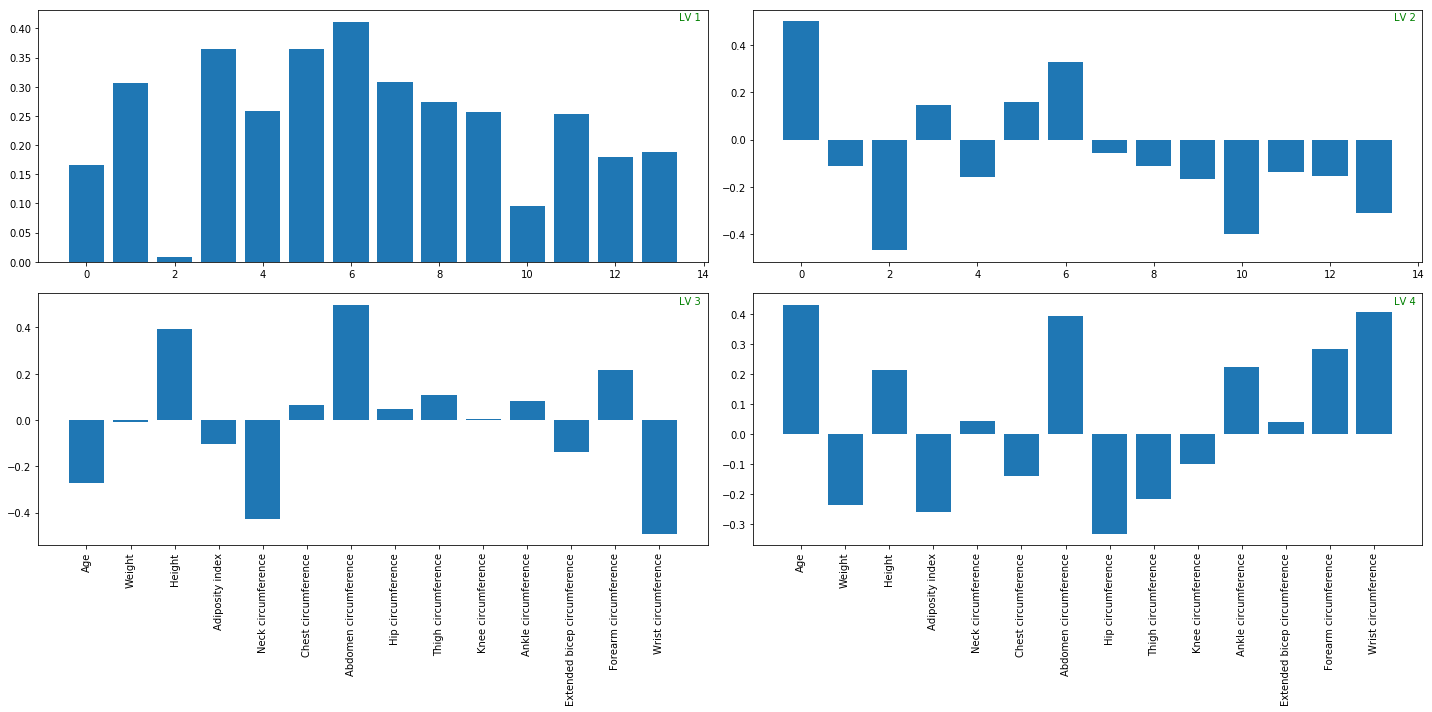

In [100]:
p = pls_models[-1]
w1 = p.x_weights_.T[0]
w2 = p.x_weights_.T[1]
w3 = p.x_weights_.T[2]
w4 = p.x_weights_.T[3]

f = plt.figure(figsize=(20, 10))

ax1 = f.add_subplot(221)
ax1.text(0.99, 0.99, "LV 1", 
         verticalalignment='top', 
         horizontalalignment='right', 
         transform=ax1.transAxes, 
         color='green')
ax1.bar(x=range(14), height=w1)

ax2 = f.add_subplot(222)
ax2.text(0.99, 0.99, "LV 2", 
         verticalalignment='top', 
         horizontalalignment='right', 
         transform=ax2.transAxes, 
         color='green')
ax2.bar(x=range(14), height=w2)

ax3 = f.add_subplot(223)
ax3.text(0.99, 0.99, "LV 3", 
         verticalalignment='top', 
         horizontalalignment='right', 
         transform=ax3.transAxes, 
         color='green')
ax3.bar(x=colnames, height=w3)
plt.xticks(rotation=90)

ax4 = f.add_subplot(224)
ax4.text(0.99, 0.99, "LV 4", 
         verticalalignment='top', 
         horizontalalignment='right', 
         transform=ax4.transAxes, 
         color='green')
ax4.bar(x=colnames, height=w4)
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

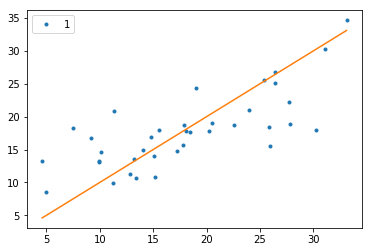

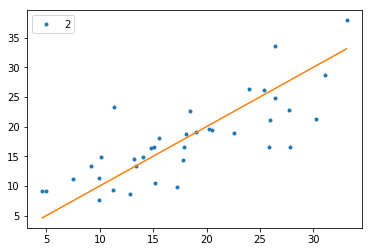

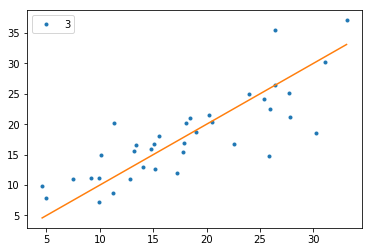

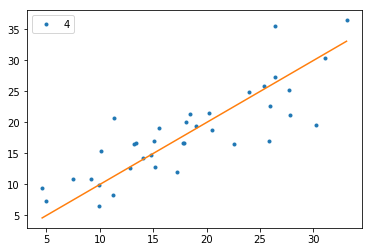

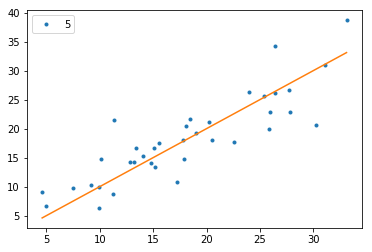

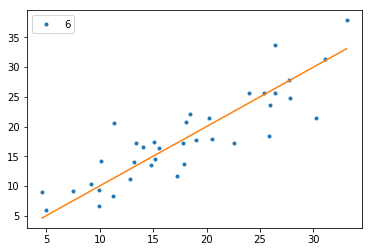

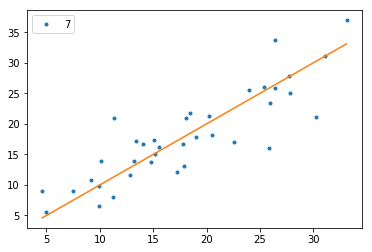

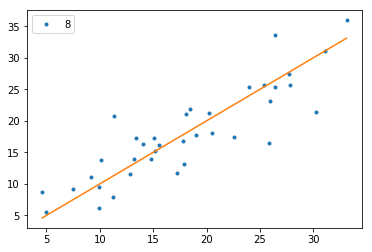

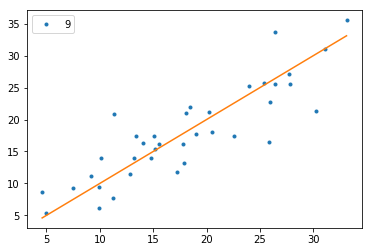

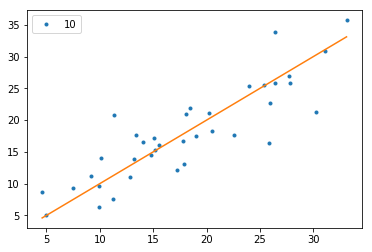

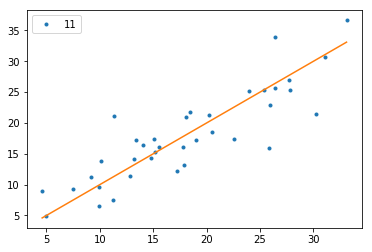

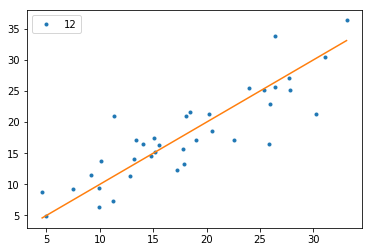

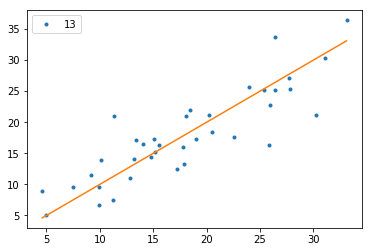

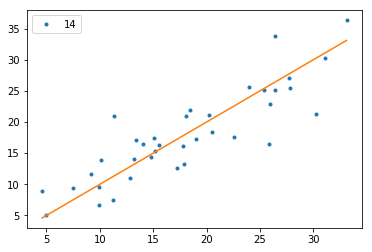

In [103]:
for p in pls_models:
    plt.plot(yts, p.predict(xts), '.', label=p.n_components)
    plt.plot([np.min(yts), np.max(yts)], [np.min(yts), np.max(yts)])
    plt.legend(loc='upper left')
    plt.show()

In [124]:
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer

In [123]:
def inv_transform(self, x):
    tmp = []
    for col in x.T:
        tmp.append(col.astype(np.float64) ** -1)
    return np.hstack([x, np.array(tmp)])

In [118]:
t = np.arange(1, 10).reshape((-1, 3))
it = InverseTransformer()
it.fit(t)
tt = it.transform(t)
print(tt)

[[ 1.          2.          3.          1.          0.25        0.14285714]
 [ 4.          5.          6.          0.5         0.2         0.125     ]
 [ 7.          8.          9.          0.33333333  0.16666667  0.11111111]]


In [143]:
pipe4 = Pipeline([
    ('poly', PolynomialFeatures()),
    ('pls', PLSRegression())
])
param_dict = {
    'pls__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'poly__degree': [1, 2, 3]
}
grid = GridSearchCV(pipe4, param_dict, scoring=make_scorer(rmse, greater_is_better=False))

In [144]:
grid.fit(xtr, ytr)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('pls', PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'pls__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'poly__degree': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(rmse, greater_is_better=False), verbose=0)

In [150]:
grid.score(xts, yts)

-4.0141302927981224

In [146]:
grid.cv_results_

{'mean_fit_time': array([ 0.00180038,  0.00288049,  0.0155863 ,  0.00120028,  0.00278083,
         0.01252564,  0.00137337,  0.00302474,  0.01339912,  0.00154638,
         0.00329463,  0.01382271,  0.00170946,  0.00342544,  0.01463334,
         0.00188057,  0.00435988,  0.01506925,  0.00203443,  0.00383925,
         0.01907142,  0.00221841,  0.0042297 ,  0.01681908,  0.00244633,
         0.00426491,  0.0178647 ,  0.00254909,  0.00453289,  0.01833145,
         0.00284179,  0.00493892,  0.01777744,  0.00362404,  0.0057896 ,
         0.01896056]),
 'std_fit_time': array([  4.89881988e-04,   1.00046135e-04,   1.41471842e-03,
          2.82706756e-05,   3.82245454e-05,   8.49620997e-05,
          3.67176653e-05,   1.15894212e-05,   2.03493388e-04,
          2.57698024e-05,   5.12392288e-05,   4.12828561e-04,
          2.00640248e-05,   2.75552014e-05,   5.03002156e-04,
          3.97076503e-05,   3.40845819e-04,   5.05122757e-04,
          2.31089803e-05,   1.97566396e-06,   2.70928129e-03,

In [147]:
grid.score(xv, yv)

-4.102672634026054

In [149]:
grid.cv_results_['params'][33]

{'pls__n_components': 12, 'poly__degree': 1}

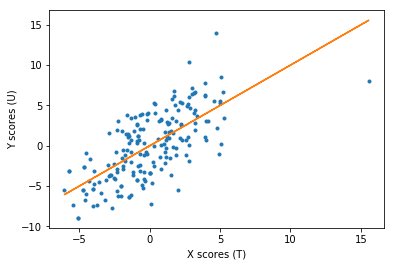

In [153]:
p = pls_models[0]
lr = LinearRegression()
lr.fit(p.x_scores_, p.y_scores_)
plt.plot(p.x_scores_, p.y_scores_, '.')
plt.plot(p.x_scores_, lr.predict(p.x_scores_))
plt.xlabel("X scores (T)")
plt.ylabel("Y scores (U)")
plt.show()

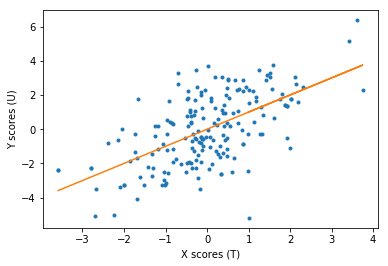

In [157]:
p = pls_models[1]
lr = LinearRegression()
lr.fit(p.x_scores_[:,1].reshape((-1, 1)), p.y_scores_[:,1].reshape((-1, 1)))
plt.plot(p.x_scores_[:,1], p.y_scores_[:,1], '.')
plt.plot(p.x_scores_[:,1], lr.predict(p.x_scores_[:,1].reshape((-1, 1))))
plt.xlabel("X scores (T)")
plt.ylabel("Y scores (U)")
plt.show()